In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')
import random

%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True

In [2]:
keys        =       ['Yp', 'H2ovH', 'He3ovH', 'Li7ovH', 'Li6ovH', 'Be7ovH', 'Neff', 'Nnu', 'alpha']
format = 'pdf'

In [7]:
df  = pd.read_table('output', sep='\t+', 
                    header=None, names = keys, index_col=['Nnu'], 
                    engine ='python')

[2, 6, 2, 6]

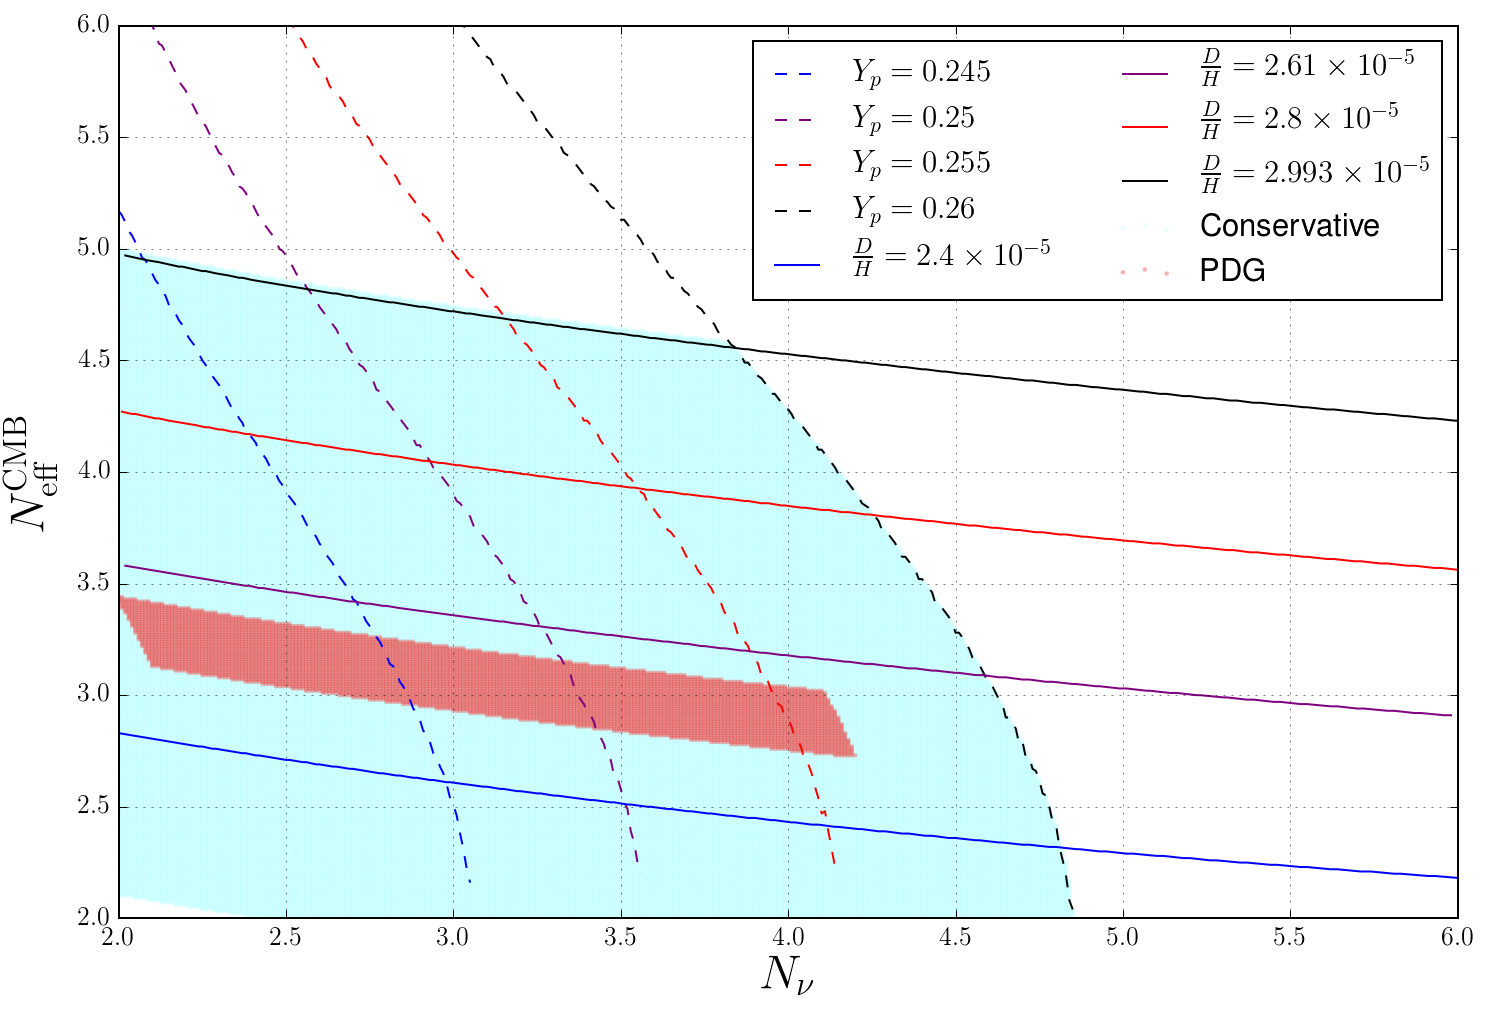

In [12]:
plt.figure(figsize=(12,8))
colors = ['blue', 'purple', 'red', 'black']

plt.rcParams.update({'font.size': 13 })

df3 = df
df3 = df3[df3['H2ovH'] >= 2.2e-5]
df3 = df3[df3['H2ovH'] <= 3.0e-5]
df3 = df3[df3['Yp'] >=0.23]
df3 = df3[df3['Yp'] <=0.26]

x = df3.index.values
y = df3['Neff'].values
temp = df3['alpha'].values

idx = [range(0, len(x), 1)]

plt.scatter(x[idx], y[idx], s = 5, edgecolors='none', label = 'Conservative', color = 'cyan', alpha = 0.1)


df3 = df
df3 = df3[df3['H2ovH'] >= 2.49e-5]
df3 = df3[df3['H2ovH'] <= 2.57e-5]
df3 = df3[df3['Yp'] >=0.2368]
df3 = df3[df3['Yp'] <=0.2562]

x = df3.index.values
y = df3['Neff'].values
temp = df3['alpha'].values

idx = [range(0, len(x), 1)]

plt.scatter(x[idx], y[idx], s = 5, edgecolors='none', label = 'PDG', color = 'r', alpha = 0.3)


for i, abundance in enumerate([.245, .25, 0.255, 0.26]):
    x = df[df['Yp'] == abundance].index
    y = df[df['Yp'] == abundance]['Neff']
    f = interp1d(x, y)
    
    plt.plot(x, f(x),
             label=r"$Y_p = %s $" % abundance, 
             alpha = 1.0,
             linestyle = '--',
             color = colors[i])

    
for i, abundance in enumerate([2.4, 2.61, 2.8, 2.993]):
    x = df[df['H2ovH'] == (abundance*1.0e-5)].index
    y = df[df['H2ovH'] == (abundance*1.0e-5)]['Neff']
    f = interp1d(x, y)
    
    plt.plot(x, f(x),
             label=r"$\frac{D}{H} = %s \times 10  ^{-5}$" % abundance, 
             alpha = 1.0,
             linestyle='-',
             color = colors[i])

plt.ylabel(r'$N_{\rm eff}^{\rm CMB}$', fontsize=24)
plt.xlabel(r'$N_{\nu}$', fontsize=24)
plt.legend(loc='best', ncol = 2)
plt.grid(True, alpha = 0.5)
plt.axis([2, 6, 2, 6])
#plt.savefig('/images/filename.%s'% format)

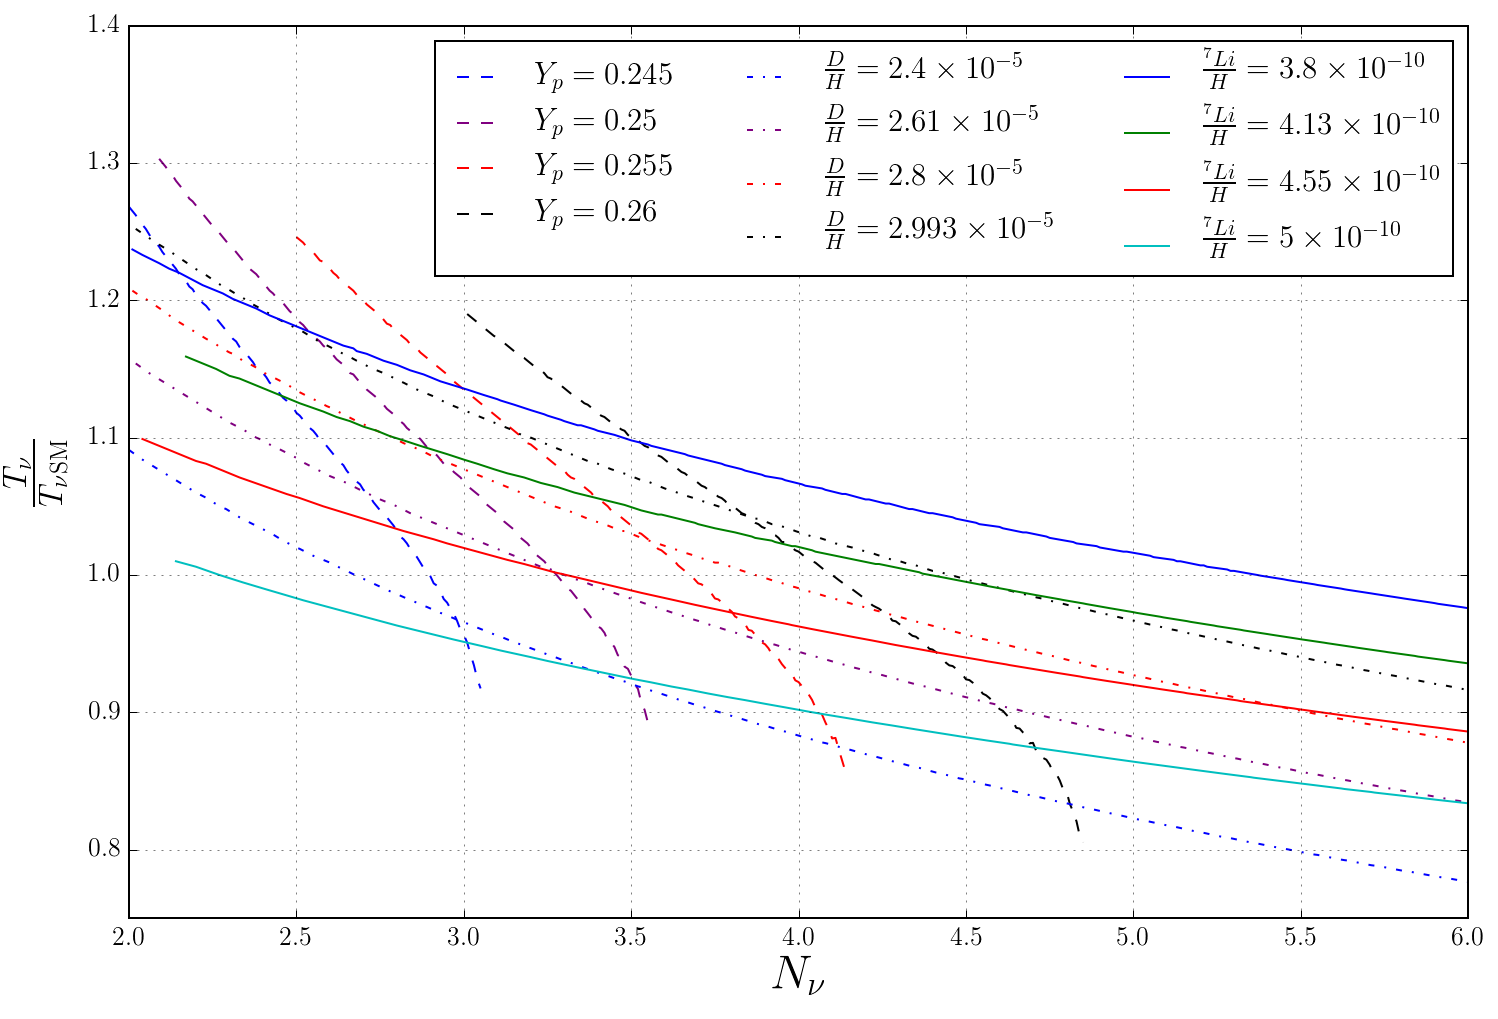

In [8]:
plt.figure(figsize=(12,8))
colors = ['blue', 'purple', 'red', 'black']

plt.rcParams.update({'font.size': 13 })

for i, abundance in enumerate([.245, .25, 0.255, 0.26]):
    x = df[df['Yp'] == abundance].index
    y = df[df['Yp'] == abundance]['alpha']
    f = interp1d(x, y)
    
    plt.plot(x, f(x),
             label=r"$Y_p = %s $" % abundance, 
             alpha = 1.0,
             linestyle = '--',
             color = colors[i])

    
for i, abundance in enumerate([2.4, 2.61, 2.8, 2.993]):
    x = df[df['H2ovH'] == (abundance*1.0e-5)].index
    y = df[df['H2ovH'] == (abundance*1.0e-5)]['alpha']
    f = interp1d(x, y)
    
    plt.plot(x, f(x),
             label=r"$\frac{D}{H} = %s \times 10  ^{-5}$" % abundance, 
             alpha = 1.0,
             linestyle='-.',
             color = colors[i])
    
for abundance in [3.8, 4.13, 4.55, 5]:
    x = df[df['Li7ovH'] == abundance * 1.0e-10].index
    y = df[df['Li7ovH'] == abundance * 1.0e-10]['alpha']
    f = interp1d(x, y)
    
    plt.plot(x, f(x), 
             label=r"$\frac{^7Li}{H} = %s \times 10^{-10} $" % abundance, 
             alpha = 1,
             linestyle='-')

#plt.ylabel('')
plt.ylabel(r'$\frac{T_\nu}{T_{\nu \rm SM}}$', fontsize = 24)
plt.xlabel(r'$N_{\nu}$', fontsize=24)
plt.legend(loc='best', ncol = 3)
plt.grid(True, alpha = 0.5)
plt.axis([2, 6, 0.75, 1.4])


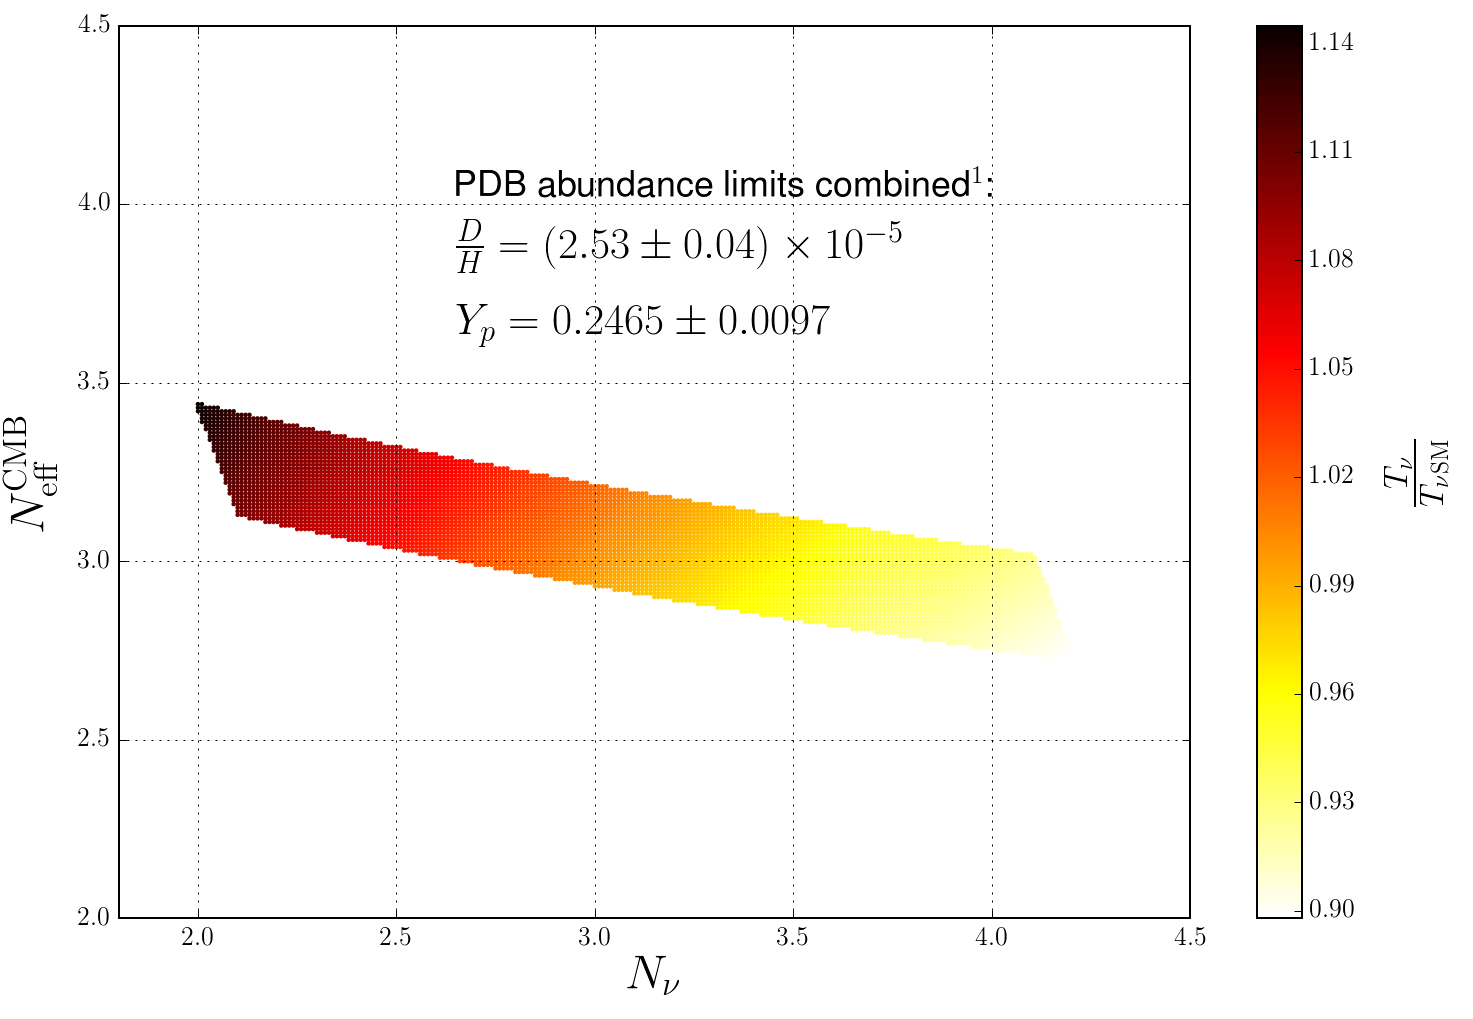

In [12]:
df3 = df
df3 = df3[df3['H2ovH'] >= 2.49e-5]
df3 = df3[df3['H2ovH'] <= 2.57e-5]
df3 = df3[df3['Yp'] >=0.2368]
df3 = df3[df3['Yp'] <=0.2562]

plt.figure(figsize=(12,8))
x = df3.index.values
y = df3['Neff'].values
temp = df3['alpha'].values

idx = [range(0, len(x), 1)]

plt.scatter(x[idx], y[idx], c=temp[idx], cmap='hot_r', s = 5, edgecolors='none')

txt_top, txt_left = 4.02, 2.65
        
plt.text(txt_left, txt_top ,         r'PDB abundance limits combined$^1$:', fontsize=18)
plt.text(txt_left, txt_top - 0.21,   r'$\frac{D}{H}  = (2.53 \pm 0.04) \times 10^{-5}$', fontsize=22)
plt.text(txt_left, txt_top - 2*0.2,  r'$Y_p  = 0.2465 \pm 0.0097$', fontsize=22)

plt.rcParams.update({'font.size': 13 })

cb1 = plt.colorbar()
cb1.set_label(r'$\frac{T_\nu}{T_{\nu \rm SM}}$', fontsize = 24, labelpad=+20)
plt.ylabel(r'$N_{\rm eff}^{\rm CMB}$', fontsize=24)
plt.xlabel(r'$N_{\nu}$', fontsize=24)
plt.grid(True)
plt.axis([1.8, 4.5, 2.0, 4.5])


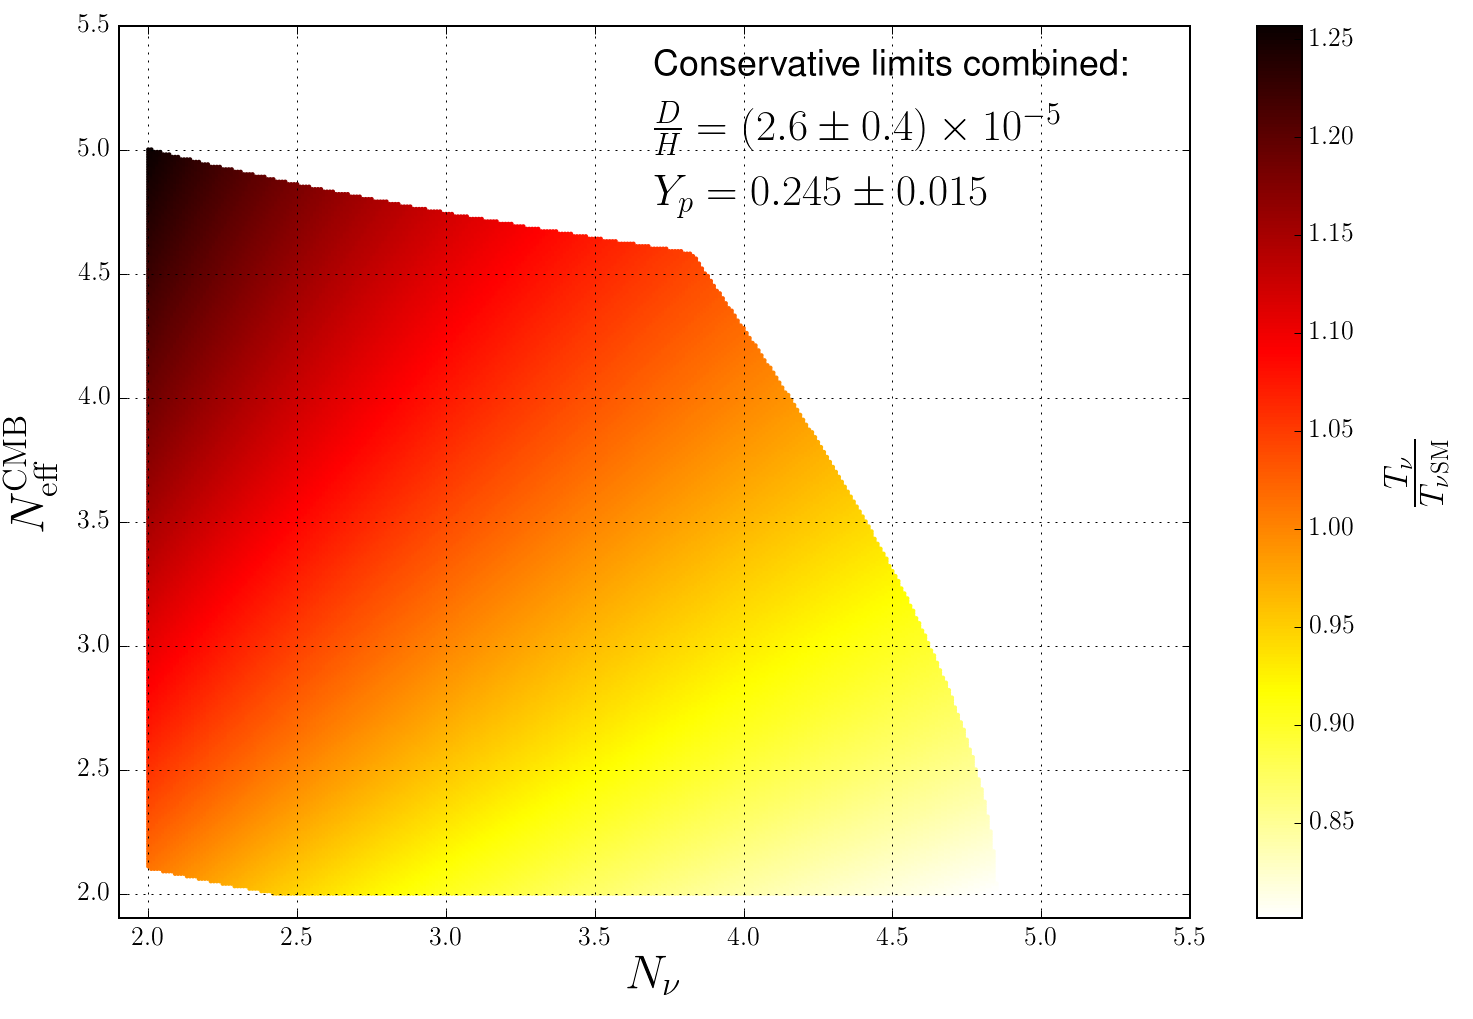

In [11]:
df3 = df
df3 = df3[df3['H2ovH'] >= 2.2e-5]
df3 = df3[df3['H2ovH'] <= 3.0e-5]
df3 = df3[df3['Yp'] >=0.23]
df3 = df3[df3['Yp'] <=0.26]

plt.figure(figsize=(12,8))
x = df3.index.values
y = df3['Neff'].values
temp = df3['alpha'].values

idx = [range(0, len(x), 1)]

plt.scatter(x[idx], y[idx], c=temp[idx], cmap='hot_r', s = 5, edgecolors='none')



txt_top, txt_left = 5.3, 3.7
        
plt.text(txt_left, txt_top ,         r'Conservative limits combined:', fontsize=18)
plt.text(txt_left, txt_top - 0.32,   r'$\frac{D}{H}  = (2.6 \pm 0.4) \times 10^{-5}$', fontsize=22)
plt.text(txt_left, txt_top - 0.55,  r'$Y_p  = 0.245 \pm 0.015$', fontsize=22)


plt.rcParams.update({'font.size': 13 })
cb1 = plt.colorbar()
cb1.set_label(r'$\frac{T_\nu}{T_{\nu \rm SM}}$', fontsize = 24, labelpad=+20)
plt.ylabel(r'$N_{\rm eff}^{\rm CMB}$', fontsize=24)
plt.xlabel(r'$N_{\nu}$', fontsize=24)
plt.legend(loc='best')
plt.grid(True)
plt.axis([1.9, 5.5, 1.9, 5.5])


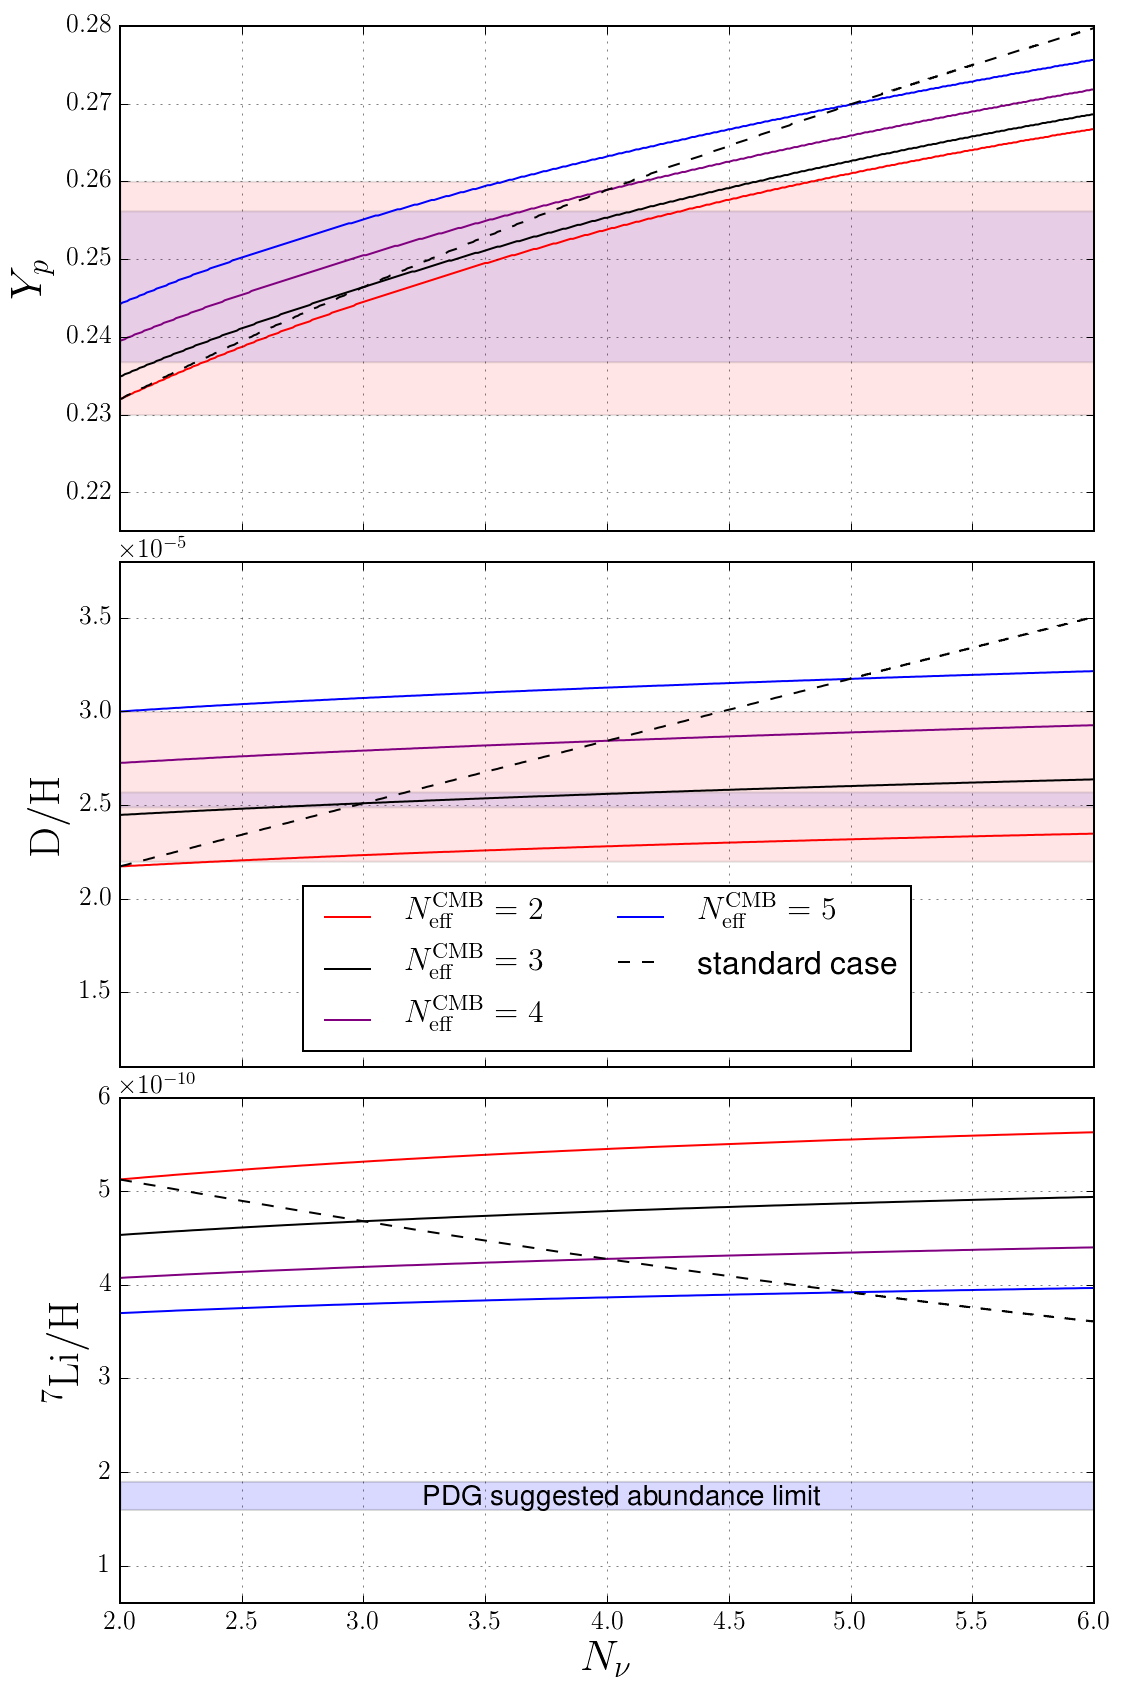

In [9]:
ax1 = plt.figure(figsize=(8,4*3))
ax1 = plt.subplot(3, 1, 1)
plt.rcParams.update({'font.size': 13 })
colors = ['red', 'black', 'purple', 'blue']

plt.fill_between(df['Neff'].index, 0.2368, 0.2562, facecolor = 'b', alpha=0.1)
plt.fill_between(df['Neff'].index, 0.23, 0.26, facecolor = 'r', alpha=0.1)

for i, neff in enumerate([2, 3, 4, 5]):
    df[df['Neff'] == neff]['Yp'].plot(color=colors[i], 
                                     label=r"$N_{\rm eff}^{\rm CMB} = %s$" % neff, 
                                     alpha = 1.)

df[df['alpha'] == 1.0]['Yp'].plot(label=r"standard case",
                                  style='k--',
                                  alpha = 1.)

plt.ylabel(r'$Y_p$', fontsize = 22)
plt.xlabel(r'$N_{\nu}$', fontsize = 22)
plt.axis([2, 6, 0.215, 0.28])
plt.grid(True, alpha = 0.5)
#plt.legend(loc = 'best', fontsize=16)

ax2 = plt.subplot(3, 1, 2, sharex=ax1)

for i, neff in enumerate([2, 3, 4, 5]):
    df[df['Neff'] == neff]['H2ovH'].plot(color=colors[i], 
                                         label=r"$N_{\rm eff}^{\rm CMB} = %s$"%neff, 
                                         alpha = 1.)
    
df[df['alpha'] == 1.0]['H2ovH'].plot(label=r"standard case",
                                  style='k--',
                                  alpha = 1.)

plt.fill_between(df['Neff'].index, 2.49e-5, 2.57e-5, facecolor = 'b', alpha=0.1)
plt.fill_between(df['Neff'].index, 2.2e-5, 3.0e-5,  facecolor = 'r', alpha=0.1)

plt.ylabel(r'${\rm D/H}$', fontsize = 22)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.axis([2, 6, 1.1e-5, 3.8e-5])
plt.grid(True, alpha = 0.5)
plt.legend(loc = 8, ncol=2,  fontsize=16)


ax3 = plt.subplot(3, 1, 3, sharex=ax1)

for i, neff in enumerate([2, 3, 4, 5]):
    df[df['Neff'] == neff]['Li7ovH'].plot(color=colors[i], 
                                         label=r"$N_{\rm eff}^{\rm CMB} = %s$"%neff, 
                                         alpha = 1.)
    
df[df['alpha'] == 1.0]['Li7ovH'].plot(label=r"standard case",
                                  style='k--',
                                  alpha = 1.)
    
plt.fill_between(df['Neff'].index, 1.6e-10, 1.9e-10, facecolor = 'b', alpha=0.15)
plt.axis([2, 6, 0.6e-10, 6e-10])

plt.text(3.25, 1.65e-10,  'PDG suggested abundance limit', fontsize=14)
plt.grid(True, alpha = 0.5)
plt.ylabel(r'$^7{\rm Li / H}$', fontsize = 22)
plt.xlabel(r'$N_{\nu}$', fontsize = 22)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.legend(loc = 3, fontsize=16)

plt.tight_layout()
plt.subplots_adjust(hspace=0.06)